# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [37]:
import numpy as np

import pandas as pd

import seaborn as sns

import graphviz

from collections import Counter

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

In [20]:
df = pd.read_csv('./input/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [22]:
print(df.isna().value_counts())

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity
False      False     False               False        False           False       False       False          False               False              20433
                                                      True            False       False       False          False               False                207
Name: count, dtype: int64


In [23]:
df.dropna(inplace=True)
print(df.isna().value_counts())

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity
False      False     False               False        False           False       False       False          False               False              20433
Name: count, dtype: int64


In [24]:
x = df.drop(columns=['median_house_value'])
y = df['median_house_value']

In [25]:
x = pd.get_dummies(x, drop_first=True)
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,True,False


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [26]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20433 non-null  float64
 1   latitude                    20433 non-null  float64
 2   housing_median_age          20433 non-null  float64
 3   total_rooms                 20433 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20433 non-null  float64
 6   households                  20433 non-null  float64
 7   median_income               20433 non-null  float64
 8   ocean_proximity_INLAND      20433 non-null  bool   
 9   ocean_proximity_ISLAND      20433 non-null  bool   
 10  ocean_proximity_NEAR BAY    20433 non-null  bool   
 11  ocean_proximity_NEAR OCEAN  20433 non-null  bool   
dtypes: bool(4), float64(8)
memory usage: 1.5 MB


In [27]:
correlation_matrix = x.corr()

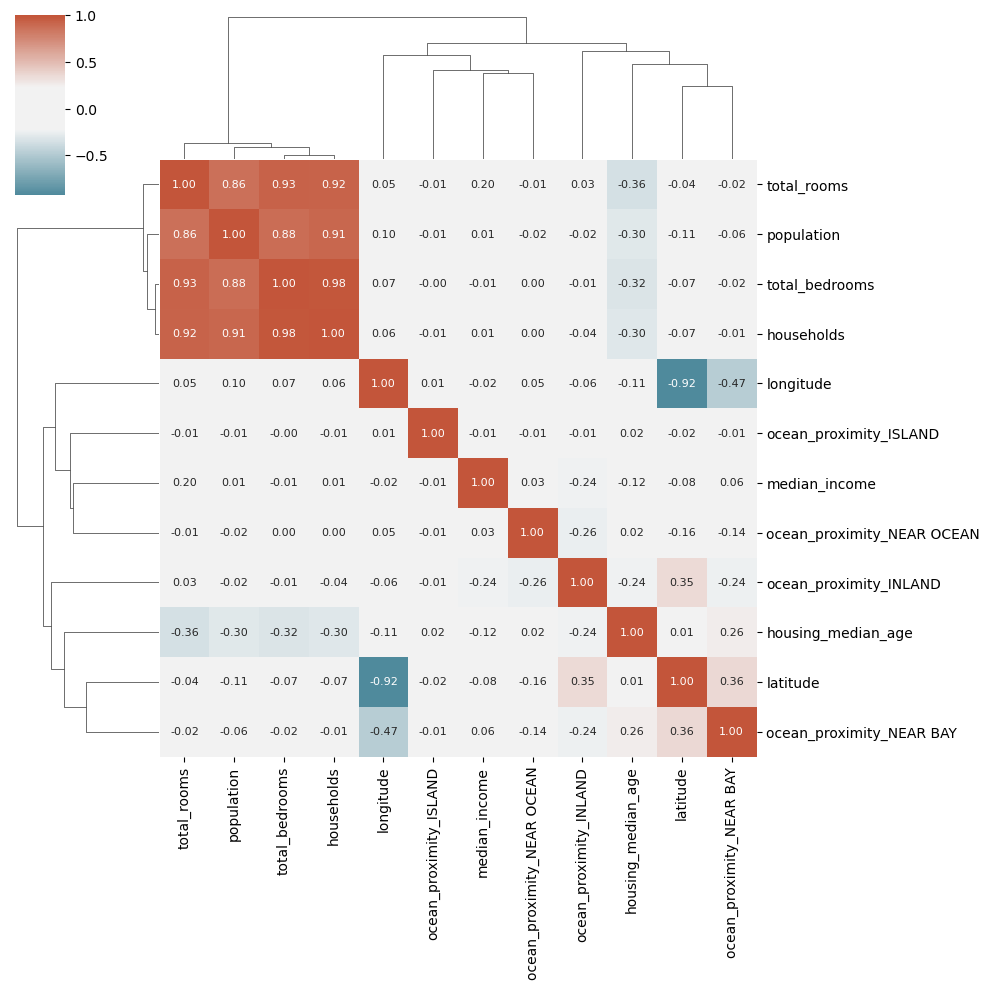

In [28]:
cmap = sns.diverging_palette(
    h_neg=220, h_pos=20, as_cmap=True, sep=60, center="light"
)
mask = np.abs(correlation_matrix) < 0

sns.clustermap(
    correlation_matrix,
    figsize=(10, 10),
    center=0,
    cmap=cmap,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 8},
    mask= mask
)

### 3. Separe os dados em validação e teste

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=100)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [30]:
regr_1 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(x_train, y_train)

regr_2 = DecisionTreeRegressor(max_depth=2)
regr_2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [31]:
mse1 = regr_1.score(x_train, y_train)
mse2 = regr_2.score(x_train, y_train)

template = "O R-Quadrado dos treinos para árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))


O R-Quadrado dos treinos para árvore com profundidade=8 é: 0,76
O R-Quadrado dos treinos para árvore com profundidade=2 é: 0,49


In [32]:
mse1 = regr_1.score(x_test, y_test)
mse2 = regr_2.score(x_test, y_test)

template = "O R-Quadrado dos testes para árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O R-Quadrado dos testes para árvore com profundidade=8 é: 0,69
O R-Quadrado dos testes para árvore com profundidade=2 é: 0,49


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Resposta: A árvore de menor profundidade se demonstrou mais estável comparando os valores de R-Quadrado, pois ambos chegaram ao mesmo valor, porém a árvore de maior profundidade apesar de haver apresentado uma queda de performance nos testes, apresenta um numero bem superior. Sendo assim, a árvore de maior profundidade é a recomendada.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

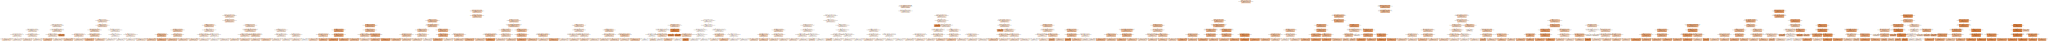

In [35]:
dot_data = tree.export_graphviz(regr_1, out_file=None, 
                                feature_names=x.columns,
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

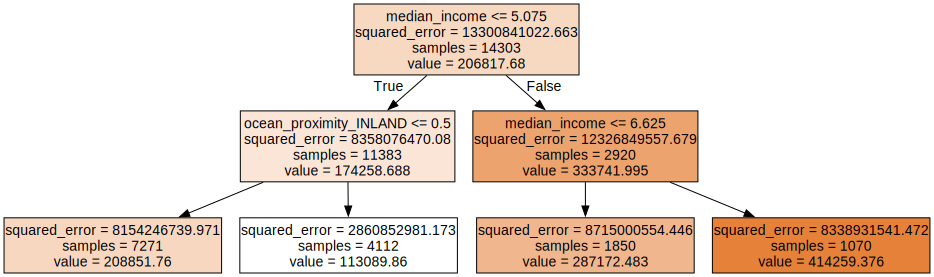

In [36]:
dot_data = tree.export_graphviz(regr_2, out_file=None, 
                                feature_names=x.columns,
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
split_features = regr_1.tree_.feature # atributo .tree_.feature utilizado para guardar as variáveis de quebra da árvore
valid_splits = split_features[split_features > 0] # Filtragem para retirar as folhas que guardam valor de -2
feature_counts = Counter(valid_splits) # Contagem das divisões em cada nó

feature_names = list(x.columns)
feature_frequency = {feature_names[key]: count for key, count in feature_counts.items()} # É criado um dicionário utilizando como chave os valores de feature_names e atribuindo a contagem das colunas em feature_counts para as respectivas chaves.

print("Frequência das variáveis de split:")
print(feature_frequency)

Frequência das variáveis de split:
{'median_income': 33, 'ocean_proximity_INLAND': 5, 'latitude': 47, 'total_bedrooms': 13, 'households': 10, 'population': 15, 'ocean_proximity_ISLAND': 1, 'ocean_proximity_NEAR OCEAN': 5, 'housing_median_age': 29, 'total_rooms': 9, 'ocean_proximity_NEAR BAY': 2}


In [52]:
split_features = regr_2.tree_.feature # atributo .tree_.feature utilziado para guardar as variáveis de quebra da árvore
valid_splits = split_features[split_features > 0] # Filtragem para retirar as folhas que guardam valor de -2
feature_counts = Counter(valid_splits) # Contagem das divisões em cada nó

feature_names = list(x.columns)
feature_frequency = {feature_names[key]: count for key, count in feature_counts.items()} # É criado um dicionário utilizando como chave os valores de feature_names e atribuindo a contagem das colunas em feature_counts para as respectivas chaves.

print("Frequência das variáveis de split:")
print(feature_frequency)

Frequência das variáveis de split:
{'median_income': 2, 'ocean_proximity_INLAND': 1}


Resposta: Nas duas árvores a variável mais frequentemente utilizada para realizar a quebra é 'median_income', sendo assim é fácil concluir que esta possui um maior impacto em oferecer leituras mais precisas